<a href="https://colab.research.google.com/github/MaxDangVu136/ml_carpentry_workshop_2023/blob/main/ml_carpentry_workshop_day2_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensemble method: whole method greater than the sum of its parts.
The individual models may have weak predictive performance, but combining them improves the performance to a point that exceeds any model by itself (think how we take multiple opinions on a subject before making final decision).
Ensemble method has highly sensitive individual components to outliers (i.e. decision tree, regression), combining components smooths this out.

Three main ensemble methods:
- Stacking -> same dataset, different models, trained in parallel
- Bagging -> different subsets of dataset, same models, trained in parallel
- Boosting -> subset of bad estimates from dataset, same models, trained in series.

Example: Use bagging (random forest) for a classification problem

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load in a dataset
penguins = sns.load_dataset('penguins')

# Prepare and define data and targeted features
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [3]:
# Remove nan values
penguins.dropna(subset=feature_names, inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
# Look for all unique penguin species in dataset
species_names = penguins['species'].unique()

# Features data of interest
X = penguins[feature_names]

# Data labels for training
y = penguins.species

X, y

(     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
 0              39.1           18.7              181.0       3750.0
 1              39.5           17.4              186.0       3800.0
 2              40.3           18.0              195.0       3250.0
 4              36.7           19.3              193.0       3450.0
 5              39.3           20.6              190.0       3650.0
 ..              ...            ...                ...          ...
 338            47.2           13.7              214.0       4925.0
 340            46.8           14.3              215.0       4850.0
 341            50.4           15.7              222.0       5750.0
 342            45.2           14.8              212.0       5200.0
 343            49.9           16.1              213.0       5400.0
 
 [342 rows x 4 columns],
 0      Adelie
 1      Adelie
 2      Adelie
 4      Adelie
 5      Adelie
         ...  
 338    Gentoo
 340    Gentoo
 341    Gentoo
 342    Gentoo
 343   

In [5]:
# Split data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('training size:', X_train.shape)
print('testing size: ', X_test.shape)

training size: (273, 4)
testing size:  (69, 4)


Train and test subsets: ratio depends on what you want/need (typically 10-20%). Every sample in testing takes away from training. Random shuffling approaches will help with that (e.g. K-folds).

Validation sets are useful during model training. You do not want to train or refine your model learning process with the test set as it would invalidate the model and the process.

Usually the test-set is hidden in competitions to prevent this exact issue.

Furthermore, validation sets helps the model and you as a data scientist to observe model convergence over time

In [6]:
from sklearn.tree import DecisionTreeClassifier

# define model
tree = DecisionTreeClassifier()

# train model
tree.fit(X_train, y_train)

# test model
tree.predict(X_test)
print(tree.score(X_test, y_test))   # Don't trust models with a score above 98% (most likely overfitting)

0.9710144927536232


[Text(0.5, 1.0, 'Decision Tree Classification')]

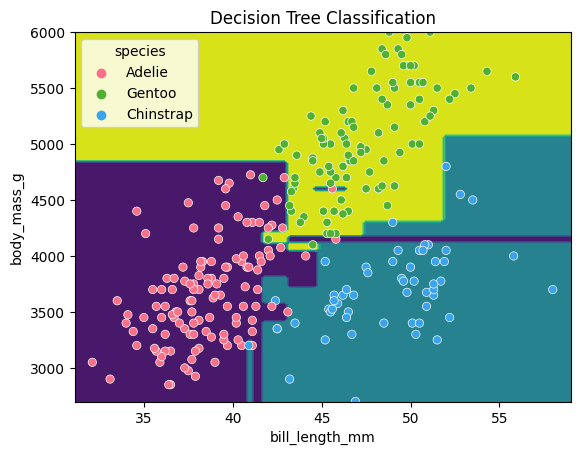

In [7]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# define two features to visualise
f1 = feature_names[0]
f2 = feature_names[3]

# redefine
tree_2d = DecisionTreeClassifier()
tree_2d.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(tree_2d, X_train[[f1, f2]])

sns.scatterplot(X_train, x=f1, y=f2, hue=y_train, palette="husl").set(
    title="Decision Tree Classification")

Train with one decision tree leads to overfitting. Random forests takes a lot of decision trees at once, then finds the average.

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Defining our model
forest = RandomForestClassifier(n_estimators=100, max_depth=7,
                                min_samples_leaf=1)

# Train our model
forest.fit(X_train, y_train)

# Compare our models
print(tree.score(X_test, y_test))
print(forest.score(X_test, y_test))

0.9710144927536232
0.9710144927536232


Reducing n_estimators does improve training time. Do we need 100 models? It does increase acc and overfit.

random_state is just an integer number to seed random number generation.

random_state : int, RandomState instance or None, default=None
    Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

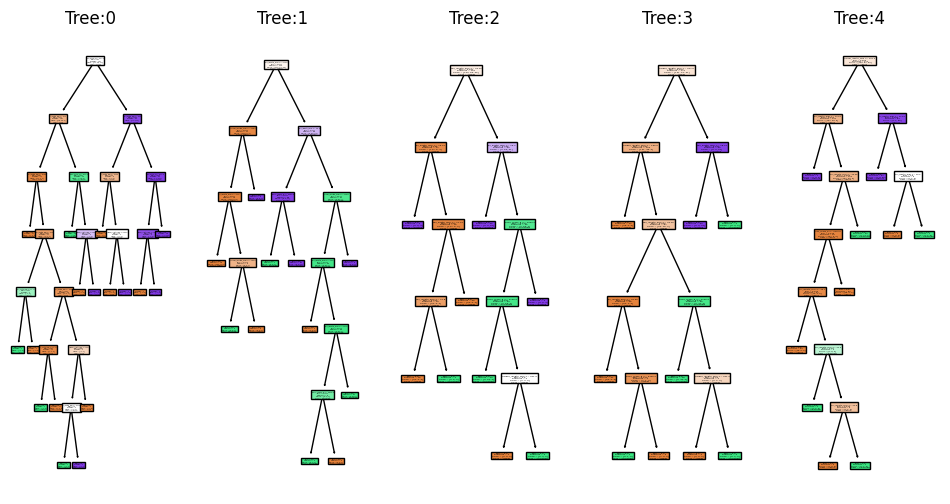

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,6))

# plot first five trees in forest
for index in range(5):
  plot_tree(forest.estimators_[index], class_names=species_names,
            feature_names=feature_names, filled=True, ax=axes[index])
  axes[index].set_title("Tree:" + str(index))

Each tree is asking similar questions.

[Text(0.5, 1.0, 'Random Forest Classification')]

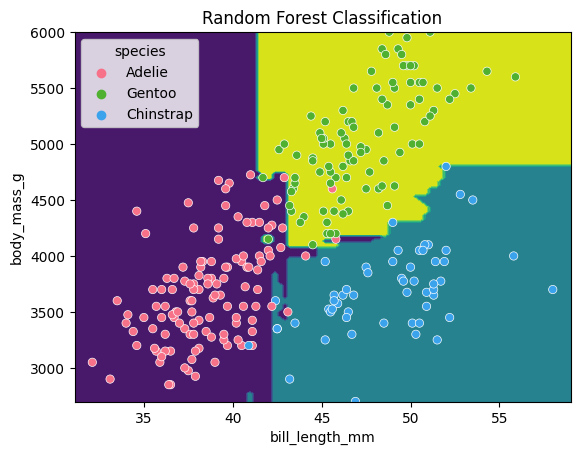

In [10]:
# Plot classification space for body mass and bill length using random forest (which we compare vs. decision tree)
forest_2d = RandomForestClassifier(n_estimators=100, max_depth=7,
                                   min_samples_leaf=1, random_state=5)
forest_2d.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(forest_2d, X_train[[f1, f2]])

sns.scatterplot(X_train, x=f1, y=f2, hue=y_train, palette='husl').set(
    title="Random Forest Classification")

**Stacking on a regression problem**

In [11]:
from sklearn.datasets import load_diabetes

print(load_diabetes())

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [12]:
# Load in data (explore data and their relations using pair plot)
X, y = load_diabetes(return_X_y=True)

X, y

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [13]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


print('training size:', X_train.shape)
print('testing size: ', X_test.shape)

training size: (353, 10)
testing size:  (89, 10)


Take a stack of linear regressor, random forest regressor, gradient boost regressor. Decision tree regressors are super sensitive to training data, as you are using a classifer on a regression problem. However, these are super good as ensemble methods. We can put an ensemble inside an ensemble.

Ensemble methods are complex models that solves classification or regression problems.

In [14]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

# define and train our models
rf_reg = RandomForestRegressor(random_state=5)
gb_reg = GradientBoostingRegressor(random_state=5)
linear_reg = LinearRegression()

rf_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)

voting_reg = VotingRegressor([("rf", rf_reg), ("gb", gb_reg), ("lr", linear_reg)])
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=5)),
                            ('gb', GradientBoostingRegressor(random_state=5)),
                            ('lr', LinearRegression())])

In [15]:
# make prediction
X_test_20 = X_test[:20]
rf_pred = rf_reg.predict(X_test_20)
gb_pred = gb_reg.predict(X_test_20)
linear_pred = linear_reg.predict(X_test_20)
voting_pred = voting_reg.predict(X_test_20)

Text(0.5, 1.0, 'Regressor predictions and voting average')

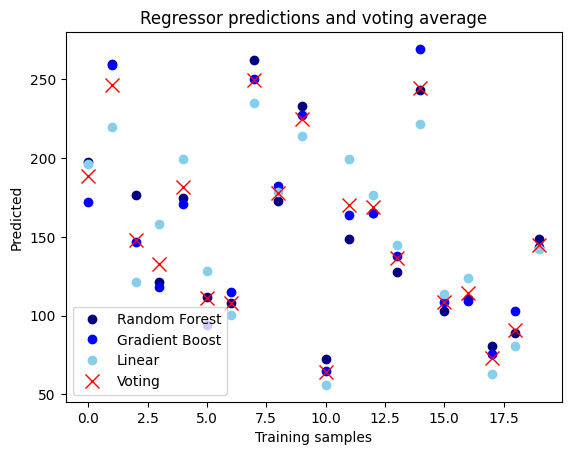

In [20]:
plt.figure()
plt.plot(rf_pred, 'o', color='navy', label='Random Forest')
plt.plot(gb_pred, 'o', color='blue', label='Gradient Boost')
plt.plot(linear_pred, 'o', color='skyblue', label='Linear')
plt.plot(voting_pred, 'x', color='red', ms=10, label='Voting')
plt.legend()
plt.ylabel('Predicted')
plt.xlabel('Training samples')
plt.title('Regressor predictions and voting average')

In [18]:
print("rf:", rf_reg.score(X_test, y_test))
print("gb:", gb_reg.score(X_test, y_test))
print("lr:", linear_reg.score(X_test, y_test))
print("voting regressor:", voting_reg.score(X_test, y_test))

rf: 0.526627803806025
gb: 0.5290702255768158
lr: 0.5271558947230806
voting regressor: 0.5520305568906223
